In [11]:
#imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
stock_tickers = ["KO","PEP"]
data = yf.download(stock_tickers, start = "2012-01-01",end ="2022-12-31", interval = '1mo', progress = False)
data

YF.download() has changed argument auto_adjust default to True


Price           Close                   High                    Low  \
Ticker             KO         PEP         KO         PEP         KO   
Date                                                                  
2012-01-01  22.388094   44.592678  23.442353   45.624825  22.069827   
2012-02-01  23.160551   42.738888  23.200335   45.482220  22.351622   
2012-03-01  24.536388   45.423862  24.662368   45.526555  22.709668   
2012-04-01  25.487514   45.184258  25.988448   45.773022  23.984713   
2012-05-01  24.956530   46.450779  25.961735   47.470846  24.535744   
...               ...         ...        ...         ...        ...   
2022-08-01  56.804508  158.780075  60.265618  166.890977  56.795305   
2022-09-01  51.566818  150.475647  57.881499  161.268682  51.465562   
2022-10-01  55.494026  168.485779  56.476879  169.784815  50.088344   
2022-11-01  58.980385  172.132385  59.045290  173.162341  53.871408   
2022-12-01  59.398674  167.632141  60.416507  173.366478  58.203418   

Price                        Open                 Volume             
Ticker             PEP         KO         PEP         KO        PEP  
Date                                                                 
2012-01-01   43.546953  23.256699   45.400740  300231600  120704200  
2012-02-01   42.324674  22.504124   44.809965  287665000  213830000  
2012-03-01   42.548503  23.163863   43.164650  410250600  138520100  
2012-04-01   44.253188  24.655965   45.362258  292370000  120469200  
2012-05-01   44.965177  25.560989   45.129482  335390800  186868900  
...                ...        ...         ...        ...        ...  
2022-08-01  158.715550  58.995313  160.881534  223178000   83528400  
2022-09-01  150.245224  56.684840  157.535821  317560600  113613100  
2022-10-01  149.371295  52.258036  151.728136  325950900  115063100  
2022-11-01  162.770005  55.660940  167.891947  269982400   97984000  
2022-12-01  165.525833  59.398674  172.104551  245985300   96723500  

[132 rows x 10 columns]

In [3]:
#compute log returns
data['ret_log_KO'] = np.log(data['Close']['KO'] / data['Close']['KO'].shift(1))
data['ret_log_PEP'] = np.log(data['Close']['PEP'] / data['Close']['PEP'].shift(1))
data

Price           Close                   High                    Low  \
Ticker             KO         PEP         KO         PEP         KO   
Date                                                                  
2012-01-01  22.388094   44.592678  23.442353   45.624825  22.069827   
2012-02-01  23.160551   42.738888  23.200335   45.482220  22.351622   
2012-03-01  24.536388   45.423862  24.662368   45.526555  22.709668   
2012-04-01  25.487514   45.184258  25.988448   45.773022  23.984713   
2012-05-01  24.956530   46.450779  25.961735   47.470846  24.535744   
...               ...         ...        ...         ...        ...   
2022-08-01  56.804508  158.780075  60.265618  166.890977  56.795305   
2022-09-01  51.566818  150.475647  57.881499  161.268682  51.465562   
2022-10-01  55.494026  168.485779  56.476879  169.784815  50.088344   
2022-11-01  58.980385  172.132385  59.045290  173.162341  53.871408   
2022-12-01  59.398674  167.632141  60.416507  173.366478  58.203418   

Price                        Open                 Volume             \
Ticker             PEP         KO         PEP         KO        PEP   
Date                                                                  
2012-01-01   43.546953  23.256699   45.400740  300231600  120704200   
2012-02-01   42.324674  22.504124   44.809965  287665000  213830000   
2012-03-01   42.548503  23.163863   43.164650  410250600  138520100   
2012-04-01   44.253188  24.655965   45.362258  292370000  120469200   
2012-05-01   44.965177  25.560989   45.129482  335390800  186868900   
...                ...        ...         ...        ...        ...   
2022-08-01  158.715550  58.995313  160.881534  223178000   83528400   
2022-09-01  150.245224  56.684840  157.535821  317560600  113613100   
2022-10-01  149.371295  52.258036  151.728136  325950900  115063100   
2022-11-01  162.770005  55.660940  167.891947  269982400   97984000   
2022-12-01  165.525833  59.398674  172.104551  245985300   96723500   

Price      ret_log_KO ret_log_PEP  
Ticker                             
Date                               
2012-01-01        NaN         NaN  
2012-02-01   0.033921   -0.042460  
2012-03-01   0.057707    0.060928  
2012-04-01   0.038031   -0.005289  
2012-05-01  -0.021053    0.027644  
...               ...         ...  
2022-08-01  -0.039090   -0.015495  
2022-09-01  -0.096737   -0.053719  
2022-10-01   0.073397    0.113050  
2022-11-01   0.060930    0.021413  
2022-12-01   0.007067   -0.026492  

[132 rows x 12 columns]

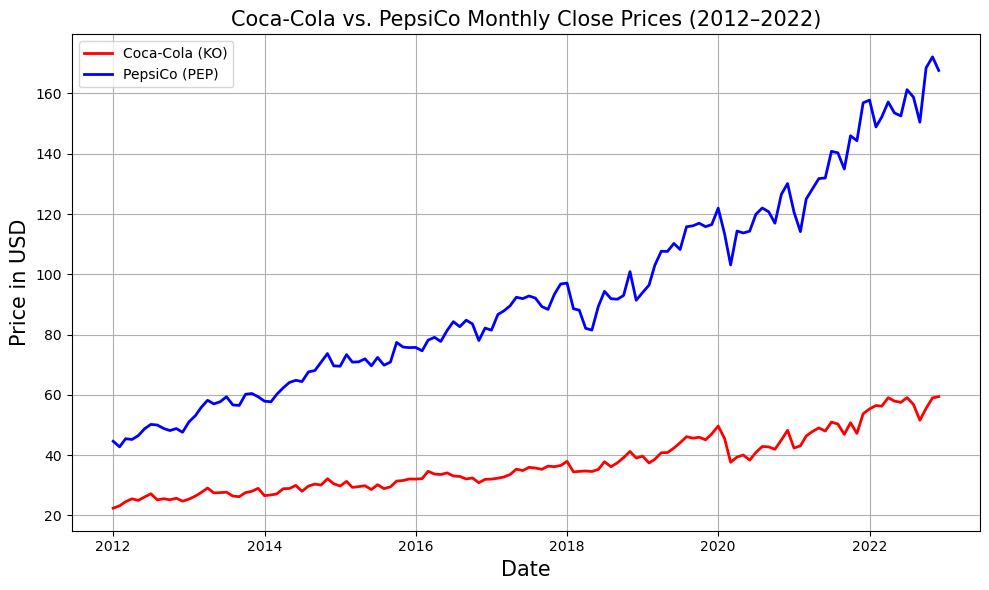

In [4]:
#graph closing values
close_prices = data['Close']

# Plotting
plt.figure(figsize=(10,6))
plt.plot(close_prices['KO'], color='red', linewidth=2, label='Coca-Cola (KO)')
plt.plot(close_prices['PEP'], color='blue', linewidth=2, label='PepsiCo (PEP)')

plt.title('Coca-Cola vs. PepsiCo Monthly Close Prices (2012–2022)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

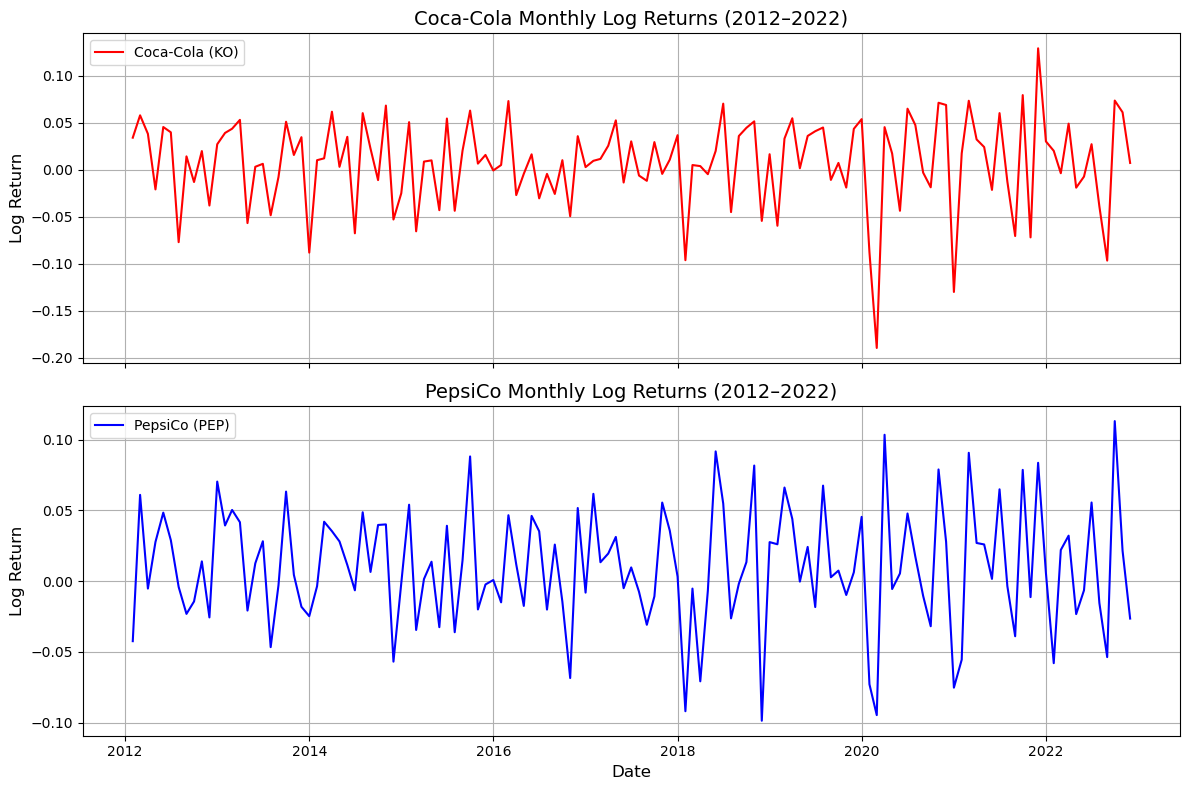

In [5]:
#graphing log return ser
# Create subplots: 2 rows, 1 column, shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Coca-Cola log returns
ax1.plot(data['ret_log_KO'], color='red', linewidth=1.5, label='Coca-Cola (KO)')
ax1.set_title('Coca-Cola Monthly Log Returns (2012–2022)', fontsize=14)
ax1.set_ylabel('Log Return', fontsize=12)
ax1.legend()
ax1.grid(True)

# Plot PepsiCo log returns
ax2.plot(data['ret_log_PEP'], color='blue', linewidth=1.5, label='PepsiCo (PEP)')
ax2.set_title('PepsiCo Monthly Log Returns (2012–2022)', fontsize=14)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Log Return', fontsize=12)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [6]:
#analyzing the log return series
data["ret_log_KO"].describe()

count    131.000000
mean       0.007448
std        0.047185
min       -0.189639
25%       -0.013463
50%        0.011374
75%        0.040223
max        0.128955
Name: ret_log_KO, dtype: float64

In [7]:
data["ret_log_PEP"].describe()

count    131.000000
mean       0.010108
std        0.041943
min       -0.098694
25%       -0.014778
50%        0.006467
75%        0.039479
max        0.113050
Name: ret_log_PEP, dtype: float64

In [8]:
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# Create a returns DataFrame with both stocks' log returns
log_returns = data[['ret_log_KO', 'ret_log_PEP']].copy()

# Drop the first row to remove the NaN from the log return calculation
log_returns = log_returns.dropna()

# Calculate summary statistics
stats_df = pd.DataFrame({
    'Mean': log_returns.mean(),
    'Std Dev': log_returns.std(),
    'Skewness': log_returns.apply(skew),
    'Kurtosis': log_returns.apply(kurtosis),
    'Max': log_returns.max(),
    'Min': log_returns.min()
})

stats_df

,,Mean,Std Dev,Skewness,Kurtosis,Max,Min
Price,Ticker,,,,,,
ret_log_KO,,0.007448,0.047185,-0.918697,1.796974,0.128955,-0.189639
ret_log_PEP,,0.010108,0.041943,-0.120637,0.016145,0.113050,-0.098694


In [9]:
# Create a DataFrame with close prices for KO and PEP
close_prices = close_prices.dropna()

# Calculate summary statistics
stats_close_df = pd.DataFrame({
    'Mean': close_prices.mean(),
    'Std Dev': close_prices.std(),
    'Skewness': close_prices.apply(skew),
    'Kurtosis': close_prices.apply(kurtosis),
    'Max': close_prices.max(),
    'Min': close_prices.min()
})

stats_close_df

,Mean,Std Dev,Skewness,Kurtosis,Max,Min
Ticker,,,,,,
KO,36.946057,9.610608,0.736829,-0.403698,59.398674,22.388094
PEP,93.002960,33.212315,0.563983,-0.575572,172.132385,42.738888


In [15]:
# Compute monthly returns for stocks and market
returns_data = data["Close"].pct_change().dropna() #dropping empty values

correlation_matrix = returns_data.corr()
correlation_matrix #show matrix

Ticker,KO,PEP
Ticker,,
KO,1.000000,0.723536
PEP,0.723536,1.000000


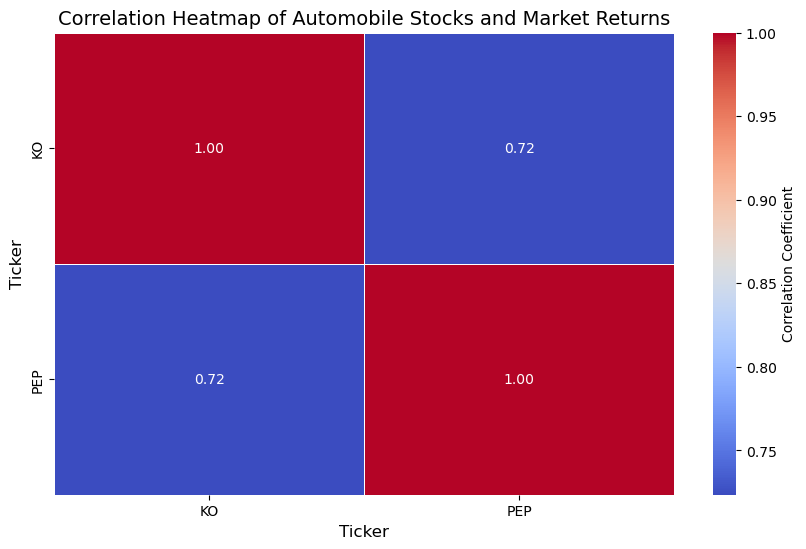

In [16]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Automobile Stocks and Market Returns", fontsize=14)
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Ticker", fontsize=12)
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("Correlation Coefficient")
plt.show()

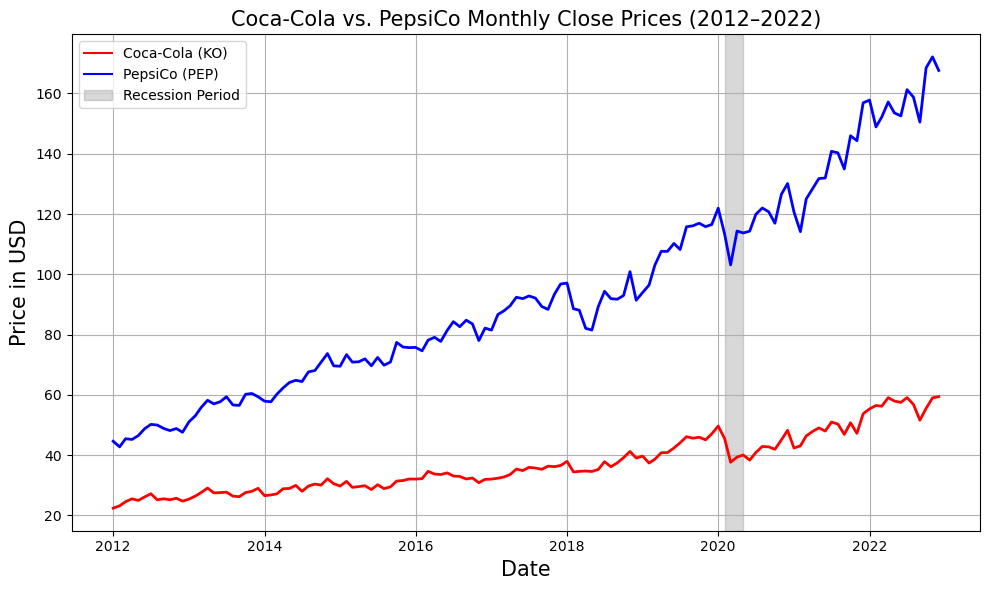

In [20]:
#enhanced graph
from matplotlib.patches import Patch

# Define recession periods
recession_periods = [
    ('2020-02-01', '2020-04-30')  # COVID-19 recession
]

# Create the plot
plt.figure(figsize=(10,6))
plt.plot(close_prices['KO'], color='red', linewidth=2, label='Coca-Cola (KO)')
plt.plot(close_prices['PEP'], color='blue', linewidth=2, label='PepsiCo (PEP)')

# Shade recession periods
for start, end in recession_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.3)

# Custom legend patch for recession
recession_patch = Patch(color='gray', alpha=0.3, label='Recession Period')

# Add title and labels
plt.title('Coca-Cola vs. PepsiCo Monthly Close Prices (2012–2022)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)

# Combine legends
plt.legend(handles=[plt.Line2D([], [], color='red', label='Coca-Cola (KO)'),
                    plt.Line2D([], [], color='blue', label='PepsiCo (PEP)'),
                    recession_patch])

plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Get close prices
close_prices = data['Close'][['KO', 'PEP']].copy()

# Drop any missing values
close_prices = close_prices.dropna()

# Create a summary dictionary
extremes = {}

for ticker in ['KO', 'PEP']:
    max_price = close_prices[ticker].max()
    max_date = close_prices[ticker].idxmax()
    min_price = close_prices[ticker].min()
    min_date = close_prices[ticker].idxmin()
    
    extremes[ticker] = {
        'Highest Price': max_price,
        'Date of High': max_date.strftime('%Y-%m'),
        'Lowest Price': min_price,
        'Date of Low': min_date.strftime('%Y-%m')
    }

# Convert to DataFrame for easy viewing
extremes_df = pd.DataFrame(extremes).T
extremes_df

#Highest Price for Coca Cola: December 2022
#Highest Price for Pepsi: November 2022

,Highest Price,Date of High,Lowest Price,Date of Low
KO,59.398674,2022-12,22.388094,2012-01
PEP,172.132385,2022-11,42.738888,2012-02


In [30]:
# Focus on log returns and volume
returns = data[['ret_log_KO', 'ret_log_PEP']].dropna()
volumes = data['Volume'][['KO', 'PEP']].dropna()

# Function to extract month windows
def get_event_window(df, event_month, window=1):
    return df[(df.index.month >= event_month - window) & (df.index.month <= event_month + window)]

# 1. Super Bowl Effect (February) — focus on Pepsi
superbowl_returns_pep = get_event_window(returns['ret_log_PEP'], 2)
superbowl_volume_pep = get_event_window(volumes['PEP'], 2)

# 2. Holiday Spike (Nov–Jan) — focus on Coca-Cola
holiday_returns_ko = returns.loc[returns.index.month.isin([11, 12, 1]), 'ret_log_KO']
holiday_volume_ko = volumes.loc[volumes.index.month.isin([11, 12, 1]), 'KO']

# Summary stats
print("=== Super Bowl Effect for Pepsi ===")
print("Average Return:", superbowl_returns_pep.mean())
print("Average Volume:", superbowl_volume_pep.mean())
print()

print("=== Holiday Spike for Coca-Cola ===")
print("Average Return:", holiday_returns_ko.mean())
print("Average Volume:", holiday_volume_ko.mean())


=== Super Bowl Effect for Pepsi ===
Average Return: 0.004418276459163187
Average Volume: 115865215.15151516

=== Holiday Spike for Coca-Cola ===
Average Return: 0.008364278430432016
Average Volume: 291084096.969697


In [31]:
#Super Bowl Effect for Pepsi: Average Return: 0.0044 (~0.44%)
#This is a modest positive return, suggesting Pepsi's stock might benefit slightly around Super Bowl season. 
#But it’s not huge, so while there's possibly a marketing buzz effect, it’s not dramatically moving the stock price.
#Average Volume: 115.9 million
#Relatively normal trading volume. This doesn’t suggest any major spike in investor activity or attention around Super Bowl ads.
#Could mean the market already "prices in" the campaign or doesn’t view it as a major financial mover.

#Holiday Spike for Coca-Cola: Average Return: 0.0084 (~0.84%)
#This is almost double Pepsi’s Super Bowl return, indicating that Coca-Cola may experience a stronger seasonal effect. The company’s holiday branding — including iconic campaigns like the polar bears and Santa trucks — could be creating a measurable bump in investor sentiment or consumer-driven optimism.
#Average Volume: 291.1 million
#This is much higher volume than Pepsi’s Super Bowl period, suggesting significantly stronger investor activity. This could reflect greater media attention, improved end-of-year performance expectations, or even institutional portfolio adjustments.

#Coca-Cola’s holiday season appears to have a stronger market impact than Pepsi’s Super Bowl campaigns. With higher returns and elevated trading volume, there’s evidence that Coca-Cola’s branding and visibility during November–January might translate into more meaningful investor behavior.
#Overall, the seasonality effect seems to play a bigger role in KO’s stock than in PEP’s — making the holidays a potentially valuable time for Coca-Cola investors to watch.

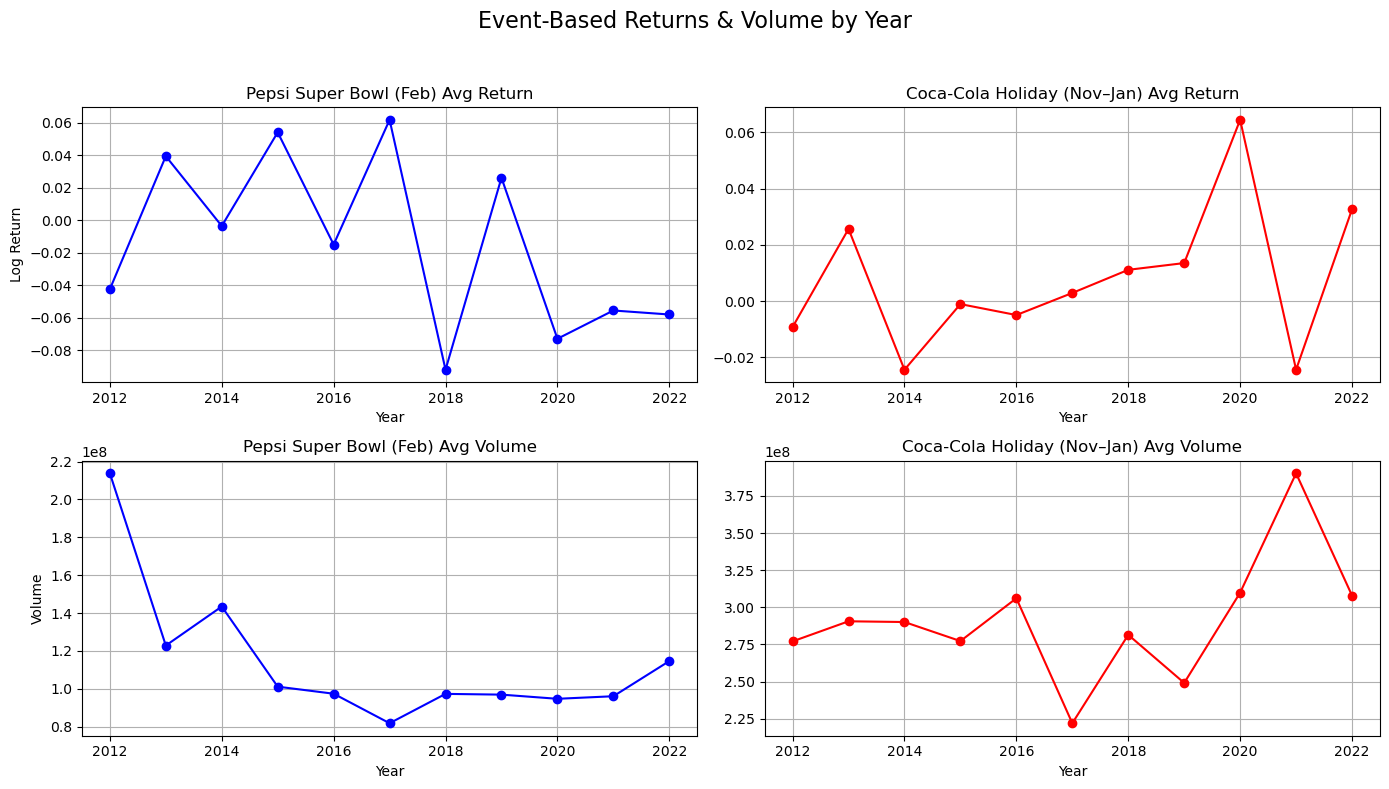

In [35]:
# Group returns/volume by year during event windows
def event_by_year(df, months, new_col_name):
    df = df[df.index.month.isin(months)].copy()
    df['Year'] = df.index.year
    grouped = df.groupby('Year').mean()
    # Rename the one column to a flat column name
    grouped.columns = [new_col_name]
    return grouped

# Super Bowl: February — Pepsi
pep_return_by_year = event_by_year(returns[['ret_log_PEP']], [2], 'Return')
pep_volume_by_year = event_by_year(volumes[['PEP']], [2], 'Volume')

# Holiday: Nov–Jan — Coca-Cola
ko_return_by_year = event_by_year(returns[['ret_log_KO']], [11, 12, 1], 'Return')
ko_volume_by_year = event_by_year(volumes[['KO']], [11, 12, 1], 'Volume')

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=False)

# Pepsi plots
axs[0, 0].plot(pep_return_by_year.index, pep_return_by_year['Return'], marker='o', color='blue')
axs[0, 0].set_title("Pepsi Super Bowl (Feb) Avg Return")
axs[0, 0].set_ylabel("Log Return")

axs[1, 0].plot(pep_volume_by_year.index, pep_volume_by_year['Volume'], marker='o', color='blue')
axs[1, 0].set_title("Pepsi Super Bowl (Feb) Avg Volume")
axs[1, 0].set_ylabel("Volume")

# Coca-Cola plots
axs[0, 1].plot(ko_return_by_year.index, ko_return_by_year['Return'], marker='o', color='red')
axs[0, 1].set_title("Coca-Cola Holiday (Nov–Jan) Avg Return")

axs[1, 1].plot(ko_volume_by_year.index, ko_volume_by_year['Volume'], marker='o', color='red')
axs[1, 1].set_title("Coca-Cola Holiday (Nov–Jan) Avg Volume")

# Formatting
for ax in axs.flat:
    ax.grid(True)
    ax.set_xlabel("Year")

plt.suptitle("Event-Based Returns & Volume by Year", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [36]:
from scipy.stats import ttest_ind

# Event vs non-event months
# Super Bowl: Feb vs. other months for Pepsi
pep_event = returns[returns.index.month == 2]['ret_log_PEP']
pep_nonevent = returns[~returns.index.month.isin([2])]['ret_log_PEP']

# Holiday: Nov, Dec, Jan vs. other months for Coca-Cola
ko_event = returns[returns.index.month.isin([11, 12, 1])]['ret_log_KO']
ko_nonevent = returns[~returns.index.month.isin([11, 12, 1])]['ret_log_KO']

# Run t-tests
t_stat_pep, p_val_pep = ttest_ind(pep_event, pep_nonevent, equal_var=False)
t_stat_ko, p_val_ko = ttest_ind(ko_event, ko_nonevent, equal_var=False)

print("=== T-Test: Super Bowl (Feb) vs Other Months — Pepsi ===")
print(f"T-statistic: {t_stat_pep:.4f}, p-value: {p_val_pep:.4f}")
print("Significant" if p_val_pep < 0.05 else "Not significant")
print()

print("=== T-Test: Holiday Season (Nov–Jan) vs Other Months — Coca-Cola ===")
print(f"T-statistic: {t_stat_ko:.4f}, p-value: {p_val_ko:.4f}")
print("Significant" if p_val_ko < 0.05 else "Not significant")

=== T-Test: Super Bowl (Feb) vs Other Months — Pepsi ===
T-statistic: -1.6107, p-value: 0.1354
Not significant

=== T-Test: Holiday Season (Nov–Jan) vs Other Months — Coca-Cola ===
T-statistic: 0.1162, p-value: 0.9080
Not significant


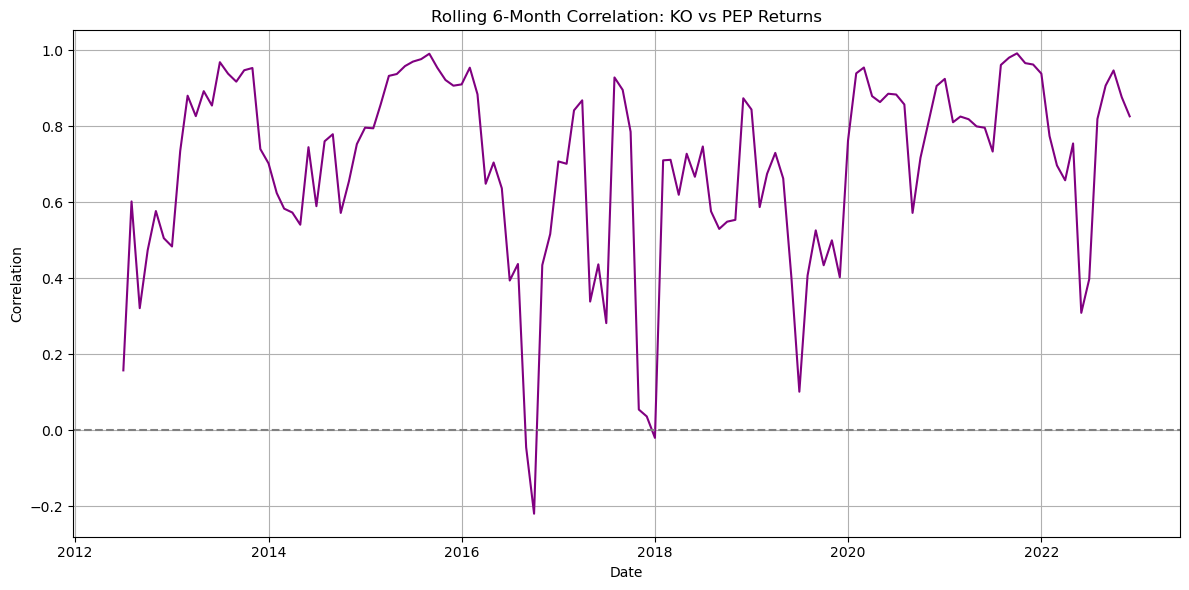

In [40]:
rolling_corr = returns['ret_log_KO'].rolling(window=6).corr(returns['ret_log_PEP'])
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, color='purple')
plt.title('Rolling 6-Month Correlation: KO vs PEP Returns')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

=== Coca-Cola: Holiday (Nov–Jan) vs. Post-Holiday (Feb) ===
Holiday Return Avg: 0.0084
Post-Holiday Return Avg: -0.0054
T-stat: 0.7586, p-value: 0.4579

=== Pepsi: Super Bowl (Feb) vs. Post-Super Bowl (Mar) ===
Super Bowl Return Avg: -0.0144
Post-Super Bowl Return Avg: 0.0234
T-stat: -1.6679, p-value: 0.1109


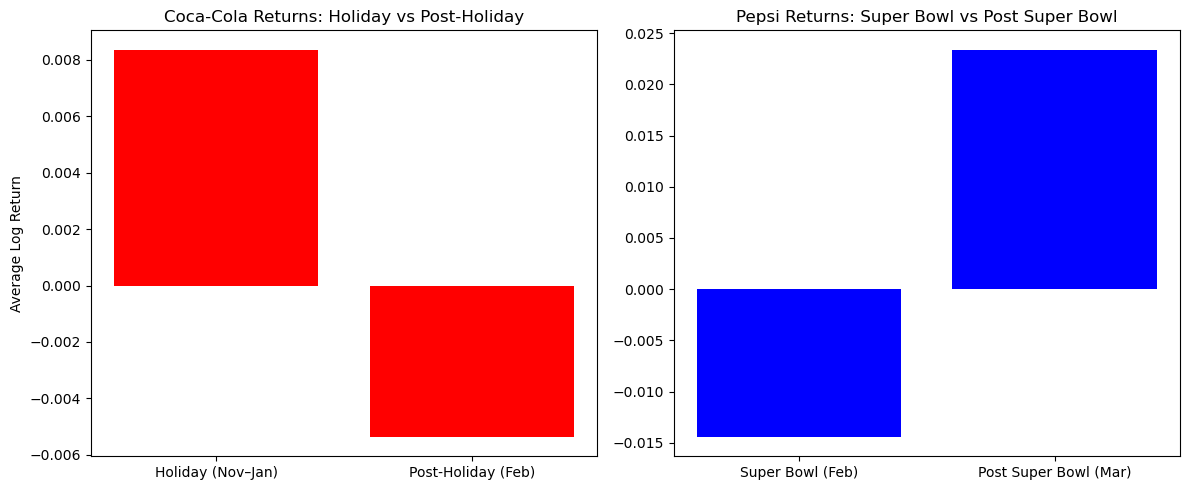

In [39]:
#lag analysis
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Define updated holiday and lag months
holiday_months = [11, 12, 1]
post_holiday_month = [2]

superbowl_month = [2]
post_superbowl_month = [3]

# Extract returns
ko_event = returns[returns.index.month.isin(holiday_months)]['ret_log_KO']
ko_lag = returns[returns.index.month.isin(post_holiday_month)]['ret_log_KO']

pep_event = returns[returns.index.month.isin(superbowl_month)]['ret_log_PEP']
pep_lag = returns[returns.index.month.isin(post_superbowl_month)]['ret_log_PEP']

# T-tests
t_ko, p_ko = ttest_ind(ko_event, ko_lag, equal_var=False)
t_pep, p_pep = ttest_ind(pep_event, pep_lag, equal_var=False)

# Print results
print("=== Coca-Cola: Holiday (Nov–Jan) vs. Post-Holiday (Feb) ===")
print(f"Holiday Return Avg: {ko_event.mean():.4f}")
print(f"Post-Holiday Return Avg: {ko_lag.mean():.4f}")
print(f"T-stat: {t_ko:.4f}, p-value: {p_ko:.4f}\n")

print("=== Pepsi: Super Bowl (Feb) vs. Post-Super Bowl (Mar) ===")
print(f"Super Bowl Return Avg: {pep_event.mean():.4f}")
print(f"Post-Super Bowl Return Avg: {pep_lag.mean():.4f}")
print(f"T-stat: {t_pep:.4f}, p-value: {p_pep:.4f}")

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# KO
axs[0].bar(['Holiday (Nov–Jan)', 'Post-Holiday (Feb)'], 
           [ko_event.mean(), ko_lag.mean()], color='red')
axs[0].set_title('Coca-Cola Returns: Holiday vs Post-Holiday')
axs[0].set_ylabel('Average Log Return')

# PEP
axs[1].bar(['Super Bowl (Feb)', 'Post Super Bowl (Mar)'], 
           [pep_event.mean(), pep_lag.mean()], color='blue')
axs[1].set_title('Pepsi Returns: Super Bowl vs Post Super Bowl')

plt.tight_layout()
plt.show()